In [53]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO
import requests

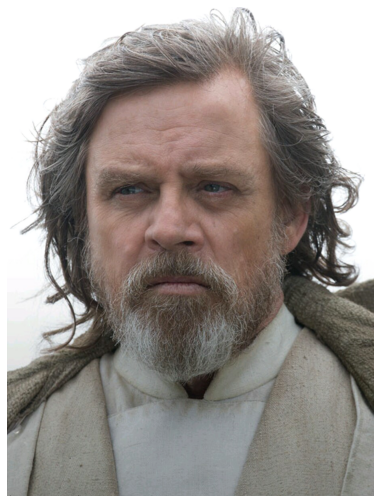

In [67]:
url = "https://static.wikia.nocookie.net/ptstarwars/images/1/15/Luke_Skywalker_Ep_7_SWCT.png/revision/latest?cb=20170117003552"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert()
img_array = np.asarray(image)


plt.figure(figsize=(15, 9))
plt.imshow(img_array)
plt.axis('off')
plt.show()

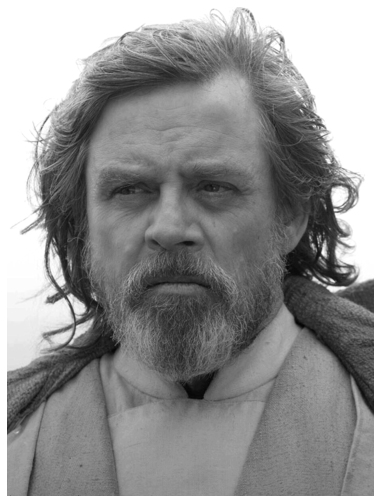

In [68]:
img_arr = np.copy(image)
img_gray_average = np.mean(img_arr, axis=2) 

# img_gray_average
plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()



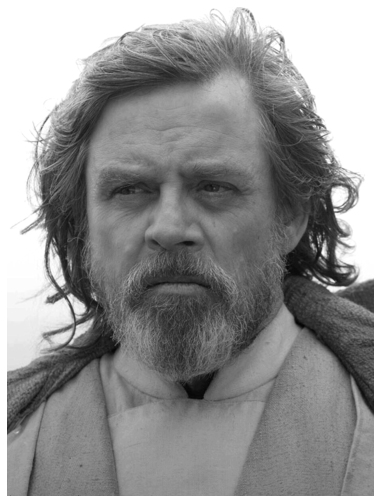

In [69]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

In [70]:
img_gray_average.shape

(1220, 915)

## Aplicação do _luminance perception_

$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

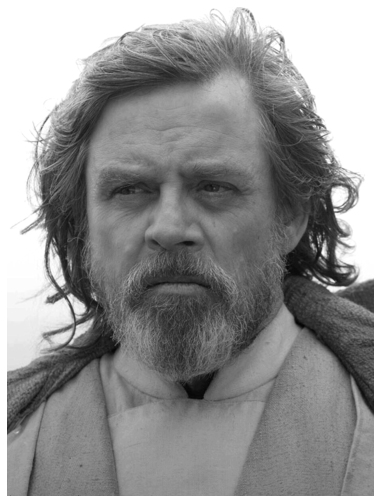

In [71]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)



plt.figure(figsize=(15, 9))
plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

#Compressão Gamma
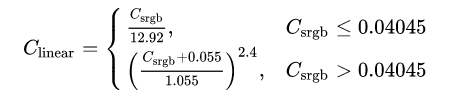

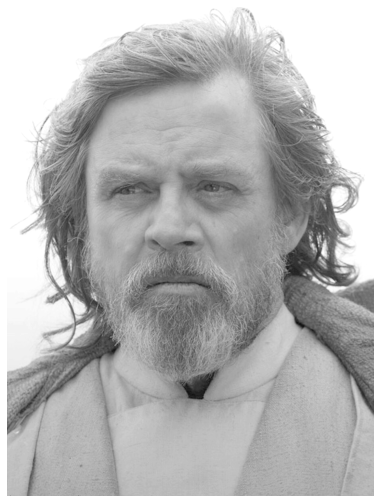

In [72]:
gamma_compression = y.copy()
gamma_compression = 255 * ((y / 255) ** (1 / 2.2))

plt.figure(figsize=(15, 9))
plt.imshow(gamma_compression, cmap='gray')
plt.axis('off')
plt.show()

# Aproximação Linear
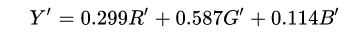


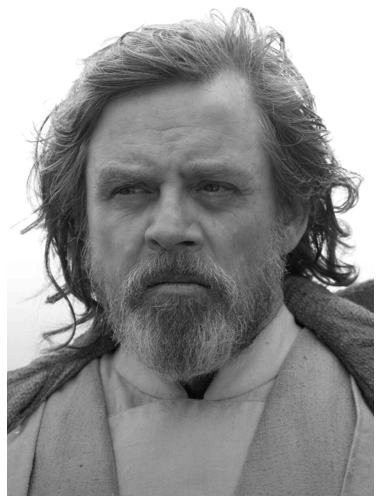

In [73]:
pesos = [0.299, 0.587, 0.114]
res = np.array(img_array * pesos, dtype=np.uint8)
linear_approximation = np.array(np.sum(res, axis=2), dtype=np.uint8)

plt.figure(figsize=(15,9))
plt.imshow(linear_approximation, cmap="gray")
plt.axis('off')
plt.show()

#COMPARE

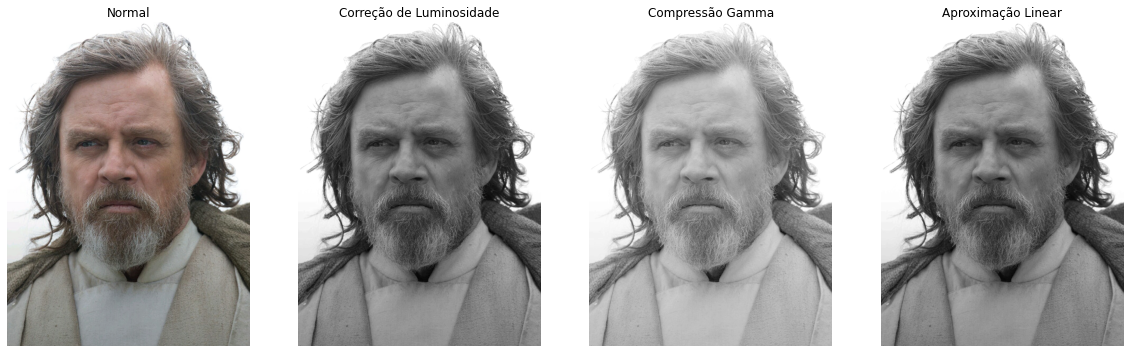

In [74]:
fig, (image, lum, gamma, linear) = plt.subplots(1, 4, figsize=(20,9))

image.imshow(img_array)
image.set_title('Normal')
image.axis('off')

lum.imshow(y, cmap='gray')
lum.set_title('Correção de Luminosidade')
lum.axis('off')

gamma.imshow(gamma_compression, cmap='gray')
gamma.set_title('Compressão Gamma')
gamma.axis('off')

linear.imshow(linear_approximation, cmap='gray')
linear.set_title('Aproximação Linear')
linear.axis('off')

plt.show()

#DUAS CORES


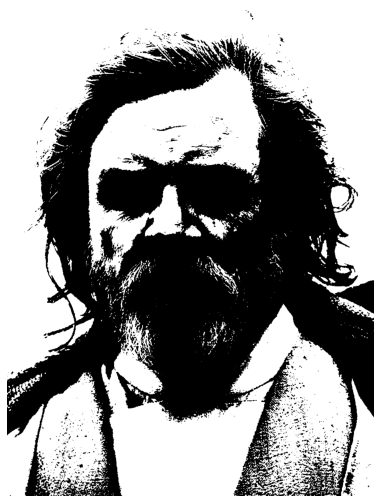

In [75]:
colours2 = y.copy()
colours2[colours2 > 127] = 255
colours2[colours2 < 127] = 0
plt.figure(figsize=(15,9))
plt.imshow(colours2, 'gray')
plt.axis('off')
plt.show()

#Quatro cores

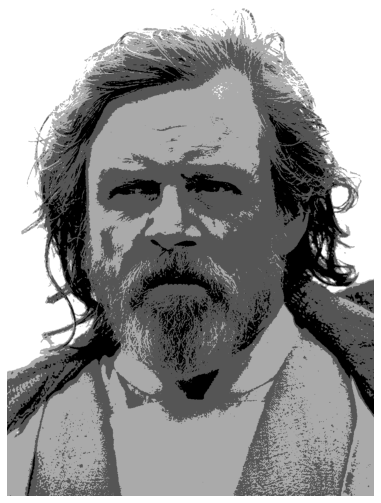

In [76]:
colours4 = y.copy()
colours4[colours4 > 191] = 192
colours4[(colours4 > 127) & (colours4 < 192)] = 128
colours4[(colours4 > 63) & (colours4 < 128)] = 64
colours4[colours4 < 64] = 0
plt.figure(figsize=(15,9))
plt.imshow(colours4, 'gray')
plt.axis('off')
plt.show()

#OITO CORES


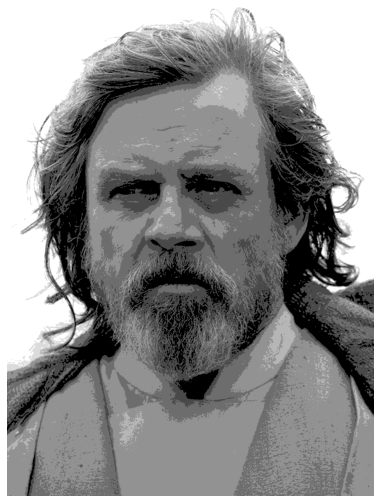

In [77]:
colours8 = y.copy()
colours8[colours8 > 223] = 224
colours8[(colours8 > 191) & (colours8 < 224)] = 192
colours8[(colours8 > 159) & (colours8 < 192)] = 160
colours8[(colours8 > 127) & (colours8 < 160)] = 128
colours8[(colours8 > 95) & (colours8 < 128)] = 96
colours8[(colours8 > 63) & (colours8 < 96)] = 64
colours8[(colours8 > 31) & (colours8 < 64)] = 32
colours8[colours8 < 64] = 0
plt.figure(figsize=(15,9))
plt.imshow(colours8, 'gray')
plt.axis('off')
plt.show()

#16 CORES

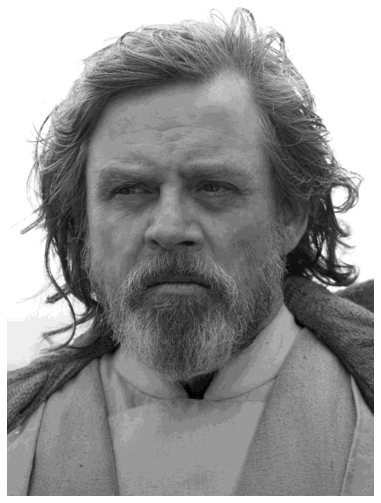

In [78]:
colours16 = y.copy()
colours16[colours16 > 239] = 240
colours16[(colours16 > 223) & (colours16 < 240)] = 224
colours16[(colours16 > 207) & (colours16 < 224)] = 208
colours16[(colours16 > 191) & (colours16 < 208)] = 192
colours16[(colours16 > 175) & (colours16 < 192)] = 176
colours16[(colours16 > 159) & (colours16 < 176)] = 160
colours16[(colours16 > 143) & (colours16 < 160)] = 144
colours16[(colours16 > 127) & (colours16 < 144)] = 128
colours16[(colours16 > 111) & (colours16 < 128)] = 112
colours16[(colours16 > 95) & (colours16 < 112)] = 96
colours16[(colours16 > 79) & (colours16 < 96)] = 80
colours16[(colours16 > 63) & (colours16 < 80)] = 64
colours16[(colours16 > 47) & (colours16 < 64)] = 48
colours16[(colours16 > 31) & (colours16 < 48)] = 32
colours16[(colours16 > 15) & (colours16 < 32)] = 16
colours16[colours16 < 16] = 0

plt.figure(figsize=(15,9))
plt.imshow(colours16, 'gray')
plt.axis('off')
plt.show()

#COMPARAÇÃO

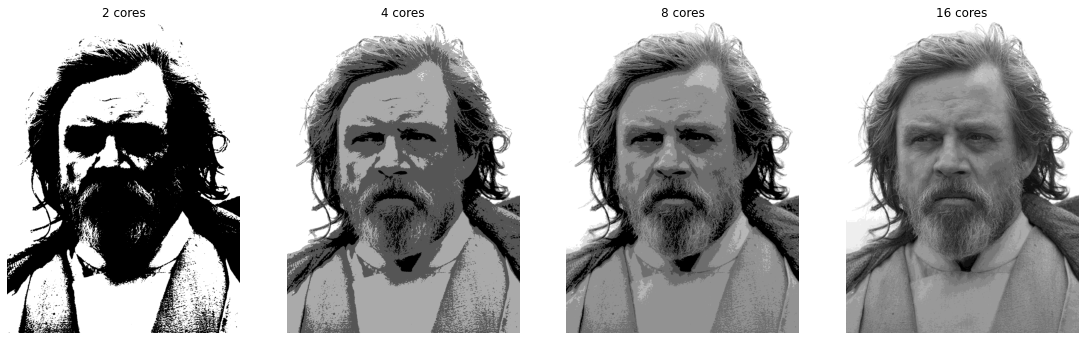

In [79]:
fig, (cor2, cor4, cor8, cor16) = plt.subplots(1, 4, figsize=(19.2, 10.8))

cor2.imshow(colours2, cmap='gray')
cor2.set_title('2 cores')
cor2.axis('off')

cor4.imshow(colours4, cmap='gray')
cor4.set_title('4 cores')
cor4.axis('off')

cor8.imshow(colours8, cmap='gray')
cor8.set_title('8 cores')
cor8.axis('off')

cor16.imshow(colours16, cmap='gray')
cor16.set_title('16 cores')
cor16.axis('off')

plt.show()